# Group Project

## Companies
Goldman Sachs - Broker Dealer\
Bank of America - Depository (Bank)\
Metlife  - Insurance

# Packages

In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Import Data

In [91]:
# adjust working directory
data = pd.read_excel('data/prices.xlsx')

In [92]:
data

,GS,Unnamed: 1,BAC,Unnamed: 3,MET,Unnamed: 5
0,Datum,Schluss,Datum,Schluss,Datum,Schluss
1,39085,200.72,39085,53.33,39085,53.6024
2,39086,198.85,39086,53.67,39086,53.9232
3,39087,199.05,39087,53.24,39087,53.2905
4,39090,203.73,39090,53.45,39090,53.2905
...,...,...,...,...,...,...
4273,45282,380.65,45282,33.43,45282,65.86
4274,45286,381.61,45286,33.86,45286,66.24
4275,45287,384.48,45287,33.84,45287,66.02
4276,45288,386.41,45288,33.88,45288,66.29


# Preprocessing

In [93]:
# Goldman Sachs (Broker Dealer)
GS = data.iloc[1:, 0:2]
GS.columns = ['date', 'price']
# from excel dates to datetime
GS['date'] = pd.to_numeric(GS['date'], errors='coerce')
GS['date'] = pd.to_datetime(GS['date'], unit='D', origin='1899-12-30')

# Bank of America (Depository)
BAC = data.iloc[1:, 2:4]
BAC.columns = ['date', 'price']
# from excel dates to datetime
BAC['date'] = pd.to_numeric(BAC['date'], errors='coerce')
BAC['date'] = pd.to_datetime(BAC['date'], unit='D', origin='1899-12-30')

# Metlife (Insurance)
MET = data.iloc[1:, 4:6]
MET.columns = ['date', 'price']
# from excel dates to datetime
MET['date'] = pd.to_numeric(MET['date'], errors='coerce')
MET['date'] = pd.to_datetime(MET['date'], unit='D', origin='1899-12-30')

# ensure price is numeric, compute proportional and log returns, drop NA, and reset index properly
GS['price'] = pd.to_numeric(GS['price'], errors='coerce')
GS['return'] = GS['price'].pct_change()
GS['log_return'] = pd.Series(np.log(GS['price'])).diff()
GS = GS.dropna().reset_index(drop=True)

BAC['price'] = pd.to_numeric(BAC['price'], errors='coerce')
BAC['return'] = BAC['price'].pct_change()
BAC['log_return'] = pd.Series(np.log(BAC['price'])).diff()
BAC = BAC.dropna().reset_index(drop=True)

MET['price'] = pd.to_numeric(MET['price'], errors='coerce')
MET['return'] = MET['price'].pct_change()
MET['log_return'] = pd.Series(np.log(MET['price'])).diff()
MET = MET.dropna().reset_index(drop=True)

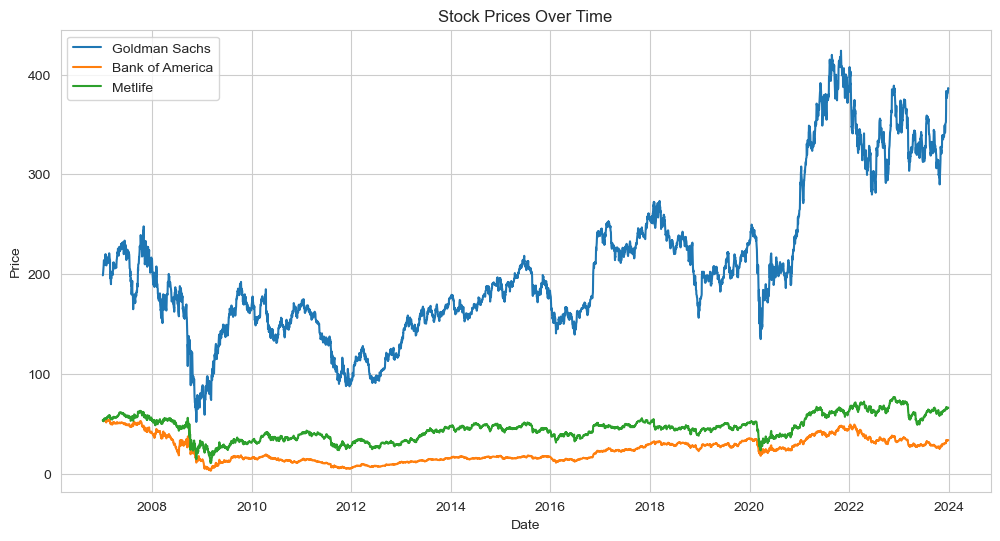

In [94]:
# plot all three price series
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(GS['date'], GS['price'], label='Goldman Sachs')
plt.plot(BAC['date'], BAC['price'], label='Bank of America')
plt.plot(MET['date'], MET['price'], label='Metlife')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

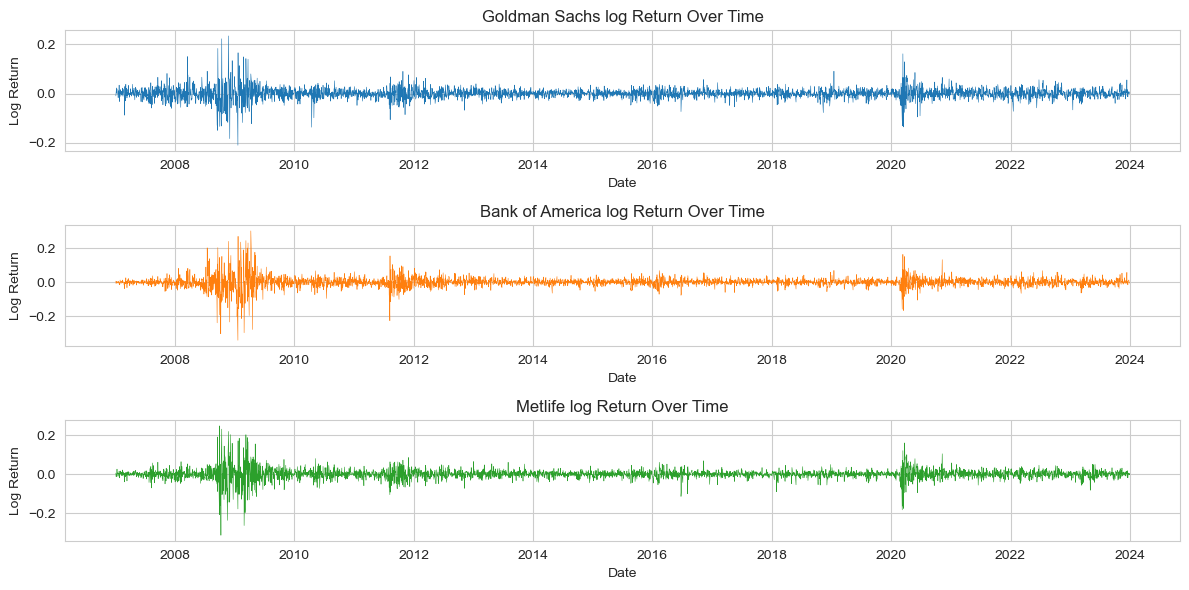

In [95]:
# plot all three log_returns series with thin lines all in subplots
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(GS['date'], GS['log_return'], label='Goldman Sachs', linewidth=0.4, color="C0")
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Goldman Sachs log Return Over Time')
plt.subplot(3, 1, 2)
plt.plot(BAC['date'], BAC['log_return'], label='Bank of America', linewidth=0.4, color="C1")
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Bank of America log Return Over Time')
plt.subplot(3, 1, 3)
plt.plot(MET['date'], MET['log_return'], label='Metlife', linewidth=0.4, color="C2")
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Metlife log Return Over Time')
plt.tight_layout()


**Analysis**\
As expected the raw price data exhibits clear non-stationarity for all three companies. In the plots of the price data we can see clear differences between Goldman Sachs and the other two companies. While Bank of America and Metlife show a long lasting downward trend during the financial crisis of 2008, Goldman Sachs seems to recover more quickly. This is likely due to the fact that Goldman Sachs is a broker-dealer and investment bank, while Bank of America is a depository bank and Metlife is an insurance company. Broker-dealers and investment banks are less exposed to credit risk than depository banks and insurance companies, which makes them less vulnerable to financial crises. The transformation to log returns seems to remove this non-stationarity. After the transformation, these differences are no longer visible.

# Analysis of returns (Stylized Facts)
We analyze the following stylized facts of the time series:
1. Stationarity
2. Heavy Tails
3. Asymmetry
4. Absence of autocorrelations
5. Long range dependence
6. Volatility Clustering
7. Aggregational Gaussianity
8. Leverage Effect

## 1. Stationarity
We apply the Augmented Dickey-Fuller test to check for stationarity of the log returns.

In [96]:
# check for stationarity with ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(series, title='', significance_level=0.05):
    print(f'Augmented Dickey-Fuller Test: {title}')
    p_value = adfuller(series.dropna(), autolag='AIC')
    if p_value[1] <= significance_level:
        print("Strong evidence against Ho, we reject the null hypothesis. The series can be considered stationary. (p-value: {:e})\n".format(p_value[1]))
    else:
        print("Weak evidence against Ho, time series has a unit root. Indicating the series is non-stationary. (p-value: {:e})\n".format(p_value[1]))

In [97]:
adf_test(GS['log_return'], title='Goldman Sachs Log Returns')
adf_test(BAC['log_return'], title='Bank of America Log Returns')
adf_test(MET['log_return'], title='Metlife Log Returns')

Augmented Dickey-Fuller Test: Goldman Sachs Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series can be considered stationary. (p-value: 1.368829e-28)

Augmented Dickey-Fuller Test: Bank of America Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series can be considered stationary. (p-value: 6.936853e-18)

Augmented Dickey-Fuller Test: Metlife Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series can be considered stationary. (p-value: 4.826873e-23)



**Interpretation**\
Based on the visual representations and the results of the ADF test, we can conclude that the log returns of all three companies (Goldman Sachs, Bank of America, and Metlife) can be considered stationary. The ADF test results show p-values well below the significance level of 0.05, indicating strong evidence against the null hypothesis of non-stationarity. This means that the statistical properties of the log returns, such as mean and variance, do not change over time, which is a key assumption for our further analysis and modeling of the time series data.\

Returns are usually stationary because they are changes in prices, which removes the long‑run growth and inflation trends present in price levels. Under market efficiency, new information arrives unpredictably, so returns fluctuate around a stable mean with roughly constant variance rather than drifting persistently. Arbitrage and competition further push excess returns back toward equilibrium, so shocks have temporary effects and autocorrelations decay quickly.

## 2. Heavy Tails
We analyze the heavy tails of the log returns using visualizations and kurtosis values.

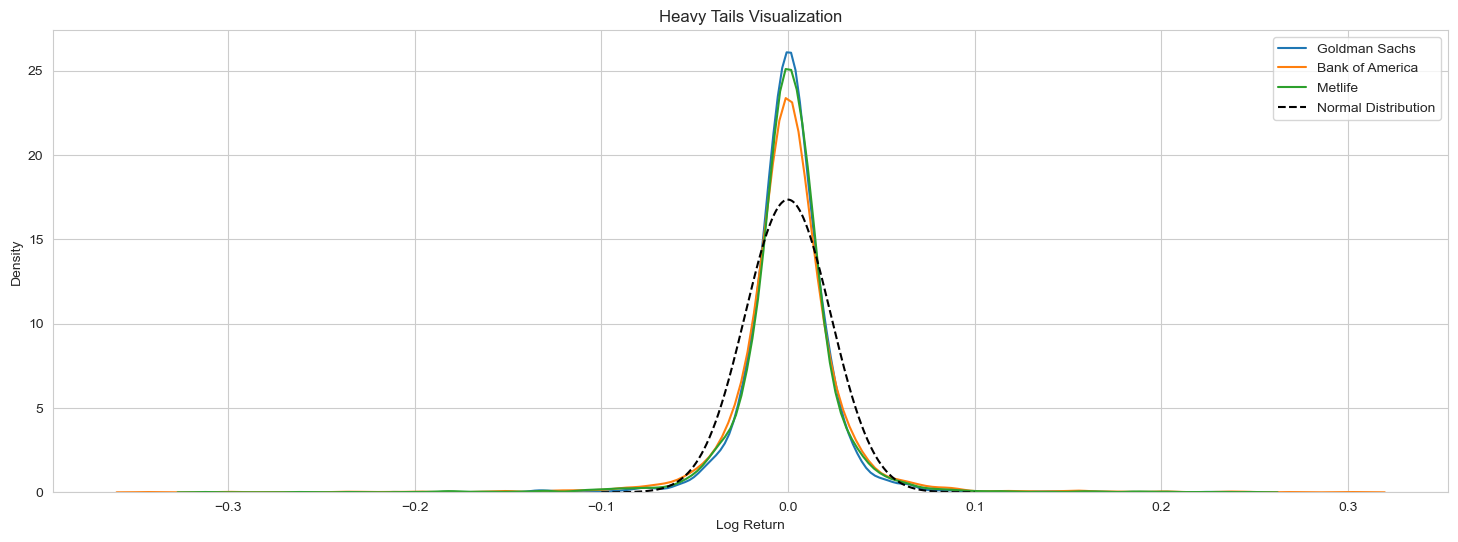

In [98]:
# heavy tails visualization
import seaborn as sns
plt.figure(figsize=(18, 6))
sns.kdeplot(GS['log_return'], label='Goldman Sachs', color="C0")
sns.kdeplot(BAC['log_return'], label='Bank of America', color="C1")
sns.kdeplot(MET['log_return'], label='Metlife', color="C2")
# plot normal distribution for comparison
from scipy.stats import norm
x = np.linspace(-0.1, 0.1, 1000)
plt.plot(x, norm.pdf(x, 0, GS['log_return'].std()), label='Normal Distribution', color='black', linestyle='--')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.title('Heavy Tails Visualization')
plt.legend()
plt.show()

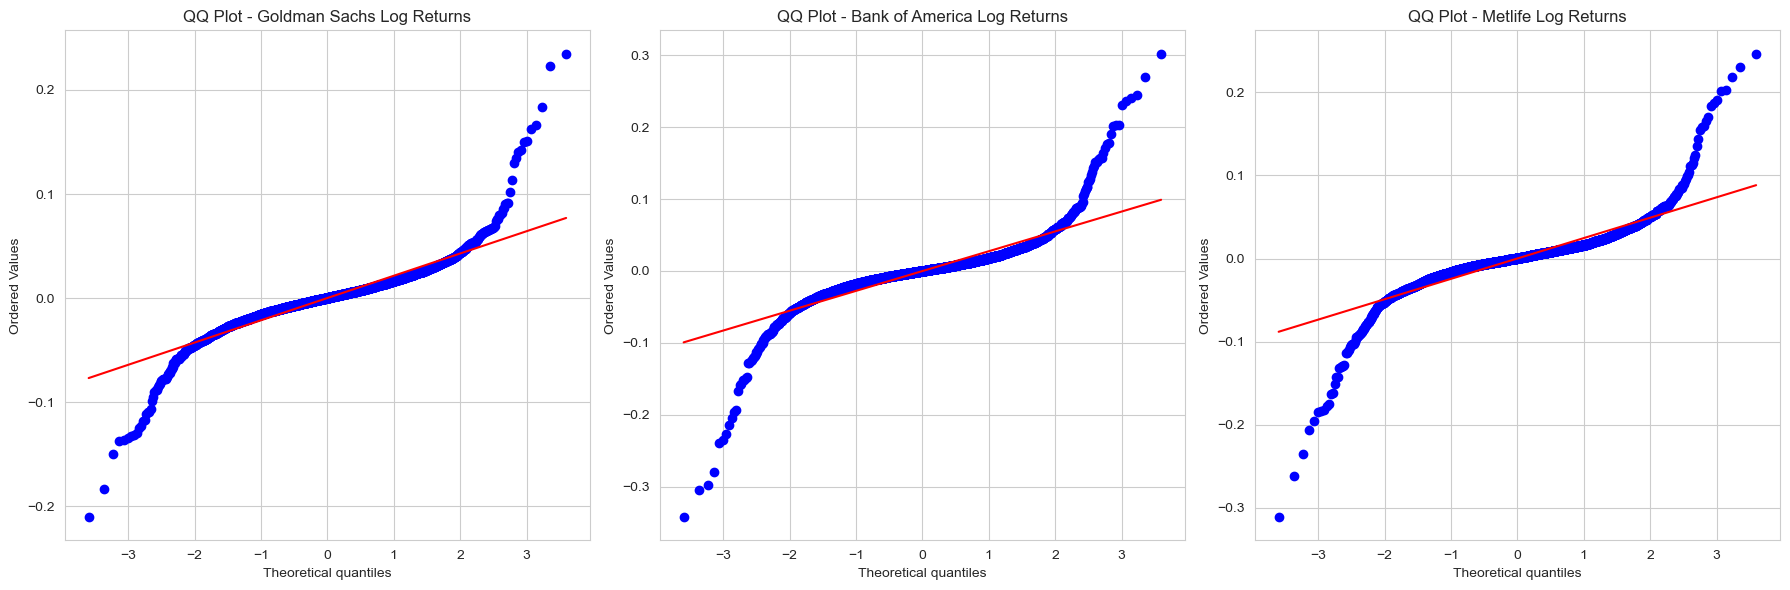

In [99]:
# qq plots to check for heavy tails
import scipy.stats as stats
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
stats.probplot(GS['log_return'], dist="norm", plot=plt)
plt.title('QQ Plot - Goldman Sachs Log Returns')
plt.subplot(1, 3, 2)
stats.probplot(BAC['log_return'], dist="norm", plot=plt)
plt.title('QQ Plot - Bank of America Log Returns')
plt.subplot(1, 3, 3)
stats.probplot(MET['log_return'], dist="norm", plot=plt)
plt.title('QQ Plot - Metlife Log Returns')
plt.tight_layout()
plt.show()

In [100]:
# kurtosis
from scipy.stats import kurtosis
print("Kurtosis:")
print("Goldman Sachs:", kurtosis(GS['log_return'], fisher=True))
print("Bank of America:", kurtosis(BAC['log_return'], fisher=True))
print("Metlife:", kurtosis(MET['log_return'], fisher=True))
print("Kurtosis of normal distribution is 3")

Kurtosis:
Goldman Sachs: 14.81637929862475
Bank of America: 23.23112425876987
Metlife: 20.593656838955653
Kurtosis of normal distribution is 3


**Interpretation**\
Looking at the heavy tails visualizations and the qq plots we can see that the log returns of all three companies exhibit clear heavy-tailed behavior. The kurtosis values for all three companies are significantly greater than 3, which is the kurtosis value for a normal distribution. This indicates that the log returns have fatter tails than a normal distribution, suggesting a higher likelihood of extreme returns (both positive and negative) compared to what would be expected under a normal distribution. This characteristic can be explained by the presence of market shocks, economic events, and other factors that can lead to sudden and significant changes in stock prices. This is due to the fact that financial returns are often influenced by a variety of unpredictable factors, leading to more frequent extreme events than would be predicted by a normal distribution.

### 2. Analysis of Kurtosis: 
Kurtosis measures the "tailedness" of the distribution. A normal distribution has a kurtosis of 3. Values above 3 indicate **leptokurtosis** (fat tails).

* All three institutions exhibit extreme leptokurtosis, far exceeding the benchmark of the normal distribution of 3.
* **Goldman Sachs:** 14.82
* **MetLife:** 20.59
* **Bank of America:** 23.23

* **Interpretation:** This confirms the stylized fact of "Heavy Tails". The probability of extreme events (deviations from the mean) is exponentially higher than a normal distribution would predict. **Bank of America (Highest Kurtosis):** A kurtosis of 23.23 indicates extreme fragility to "black swan" events. Depositories are highly leveraged institutions; small shocks to asset values can wipe out equity. This extreme kurtosis likely captures the violent volatility of the 2008 Financial Crisis.
* **Risk Management Implication:** A standard Value-at-Risk (VaR) model assuming normality will disastrously underestimate risk. The "tail events" (losses beyond the VaR) are far more frequent and severe than Gaussian distributions will capture. This mandates the use of **Student-t distributions** or **Extreme Value Theory** for accurate modeling.

## 3. Asymmetry
We analyze the skewness of the log returns to assess asymmetry in the distribution.

In [101]:
# skewness
from scipy.stats import skew
print("Skewness:")
print("Goldman Sachs:", skew(GS['log_return']))
print("Bank of America:", skew(BAC['log_return']))
print("Metlife:", skew(MET['log_return']))
print("Skewness of normal distribution is 0")

Skewness:
Goldman Sachs: 0.18747890499592207
Bank of America: -0.29323946556798924
Metlife: -0.48028760606666815
Skewness of normal distribution is 0


In [102]:
# skewness z test
import scipy.stats as stats
def skewness_z_test(series, title='', significance_level=0.05):
    n = len(series)
    skewness = skew(series)
    std_error = np.sqrt(6/n)
    z_score = skewness / std_error
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    print(f'Skewness Z-Test: {title}')
    if p_value <= significance_level:
        print("Strong evidence against Ho, we reject the null hypothesis. The series is significantly skewed. (p-value: {:e})\n".format(p_value))
    else:
        print("Weak evidence against Ho, the series is not significantly skewed. (p-value: {:e})\n".format(p_value))

In [103]:
skewness_z_test(GS['log_return'], title='Goldman Sachs Log Returns')
skewness_z_test(BAC['log_return'], title='Bank of America Log Returns')
skewness_z_test(MET['log_return'], title='Metlife Log Returns')

Skewness Z-Test: Goldman Sachs Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series is significantly skewed. (p-value: 5.589028e-07)

Skewness Z-Test: Bank of America Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series is significantly skewed. (p-value: 4.884981e-15)

Skewness Z-Test: Metlife Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series is significantly skewed. (p-value: 0.000000e+00)




### Analysis of Skewness: 
Skewness measures the asymmetry of the return distribution 
We generally expect negative skewness, meaning large losses are more common than large gains.

* **MetLife (Insurance) - Skewness: -0.48**

  * **Interpretation:** This significant negative skewness indicates a "left-tailed" distribution. This aligns with the insurance business model, which is structurally short volatility. Insurers collect steady, small premiums (positive returns) most of the time but face rare, catastrophic payout events (large negative returns). The heavy left tail reflects this exposure to disaster risk or sudden asset devaluation which impacts their large investment portfolios.


* **Bank of America (Depository) - Skewness: -0.29**
  * **Interpretation:** Also negatively skewed, though less severe than MetLife. This reflects the traditional banking risk profile. Banks earn steady interest margins (net interest income) but are exposed to credit shocks, liquidity runs, or sudden macro-devaluations (like the 2008 crisis or 2023). The negative skew implies that "bad surprises" in credit markets are more frequent and severe than "good surprises."


* **Goldman Sachs (Broker-Dealer) - Skewness: +0.19**
  * **Interpretation:** This positive skewness is an anomaly. Right-tailed returns suggests large positive returns are more likely than large negative ones. This deviates from the standard stylized fact of negative asymmetry. As a broker-dealer and investment bank, Goldman Sachs relies heavily on trading revenue, advisory fees, and market-making. Positive skewness can appear in trading-heavy portfolios that are "long volatility" (gamma)—meaning they profit disproportionately from high volatility events. This suggests that during the sample period (2007-2023), Goldman was effective at capitalizing on market dislocations rather than just suffering from them.



## 4. Absence of autocorrelations
We analyze the autocorrelation of log returns to check for absence of autocorrelations.

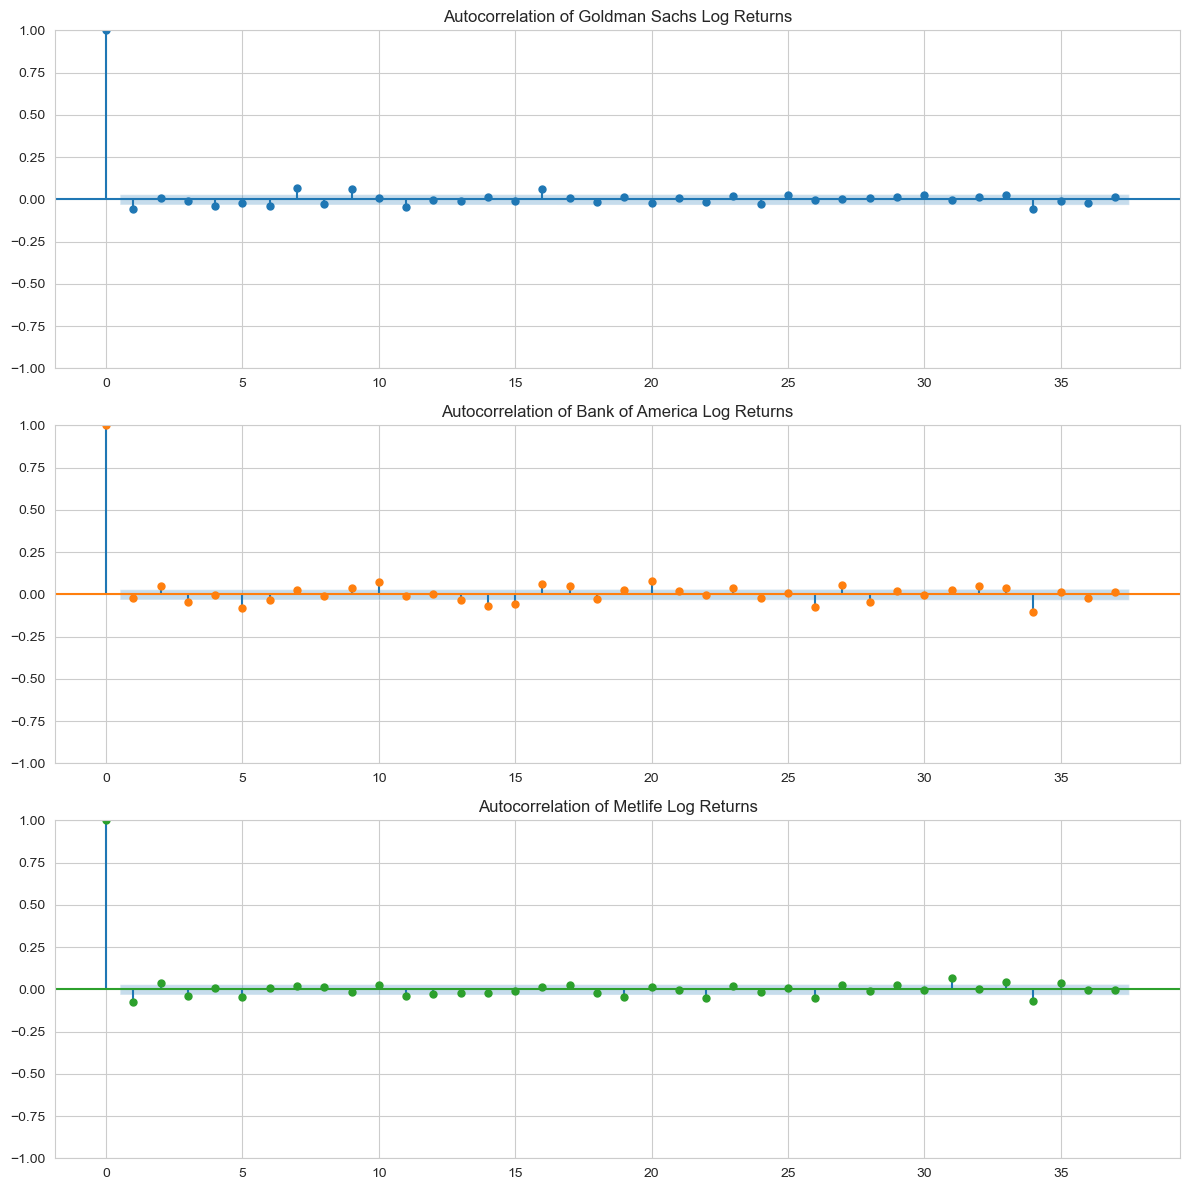

In [104]:
# autocorrelation of log returns (dont plot for lag = 0)
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plot_acf(GS['log_return'], ax=plt.gca(), title='Autocorrelation of Goldman Sachs Log Returns', color='C0')
plt.subplot(3, 1, 2)
plot_acf(BAC['log_return'], ax=plt.gca(), title='Autocorrelation of Bank of America Log Returns', color='C1')
plt.subplot(3, 1, 3)
plot_acf(MET['log_return'], ax=plt.gca(), title='Autocorrelation of Metlife Log Returns', color='C2')
plt.tight_layout()
plt.show()

### interpretation
All three stock log returns exhibit negligible autocorrelations across various lags, confirming the 'Absence of Autocorrelations' stylised fact. This suggests that past returns are not predictive of future returns, which is consistent with the Efficient Market Hypothesis. The absence of significant autocorrelation implies that price fluctuations are primarily influenced by new information rather than historical price patterns, supporting the notion that markets are efficient and returns follow a random walk.

## 5. Long range dependence
We analyze the long range dependence of log returns using a visual representation of the autocorrelation of squared returns.

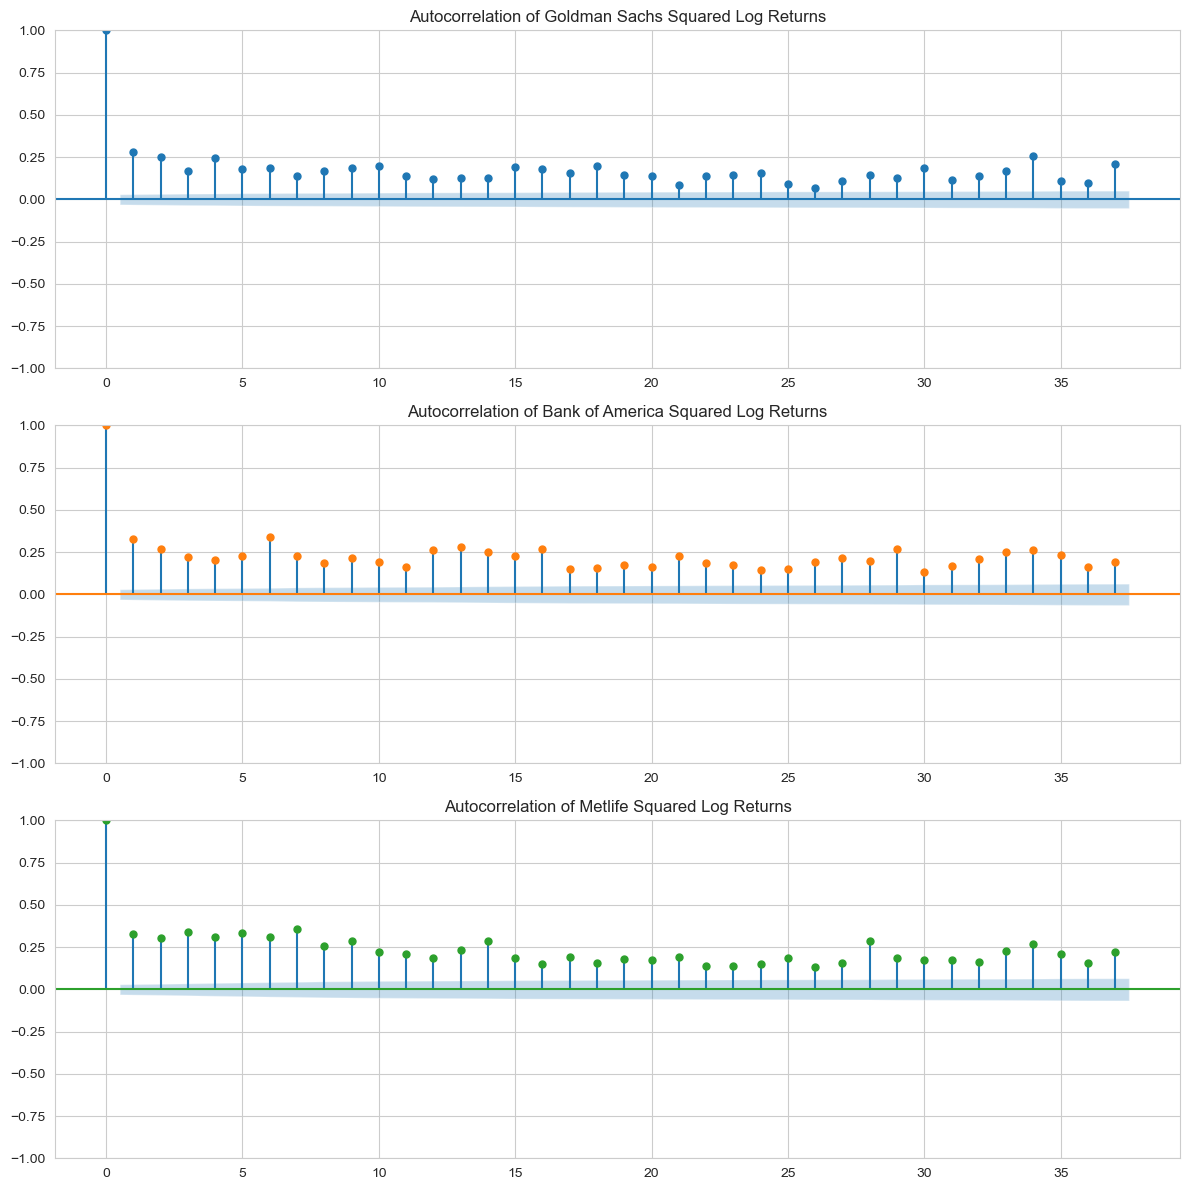

In [105]:
# autocorrelation of squared log returns
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plot_acf(GS['log_return']**2, ax=plt.gca(), title='Autocorrelation of Goldman Sachs Squared Log Returns', color='C0')
plt.subplot(3, 1, 2)
plot_acf(BAC['log_return']**2, ax=plt.gca(), title='Autocorrelation of Bank of America Squared Log Returns', color='C1')
plt.subplot(3, 1, 3)
plot_acf(MET['log_return']**2, ax=plt.gca(), title='Autocorrelation of Metlife Squared Log Returns', color='C2')
plt.tight_layout()
plt.show()

### interpretation
The autocorrelation plots for the squared log returns of all three companies (Goldman Sachs, Bank of America, and Metlife) do not exhibit a clear decline over increasing lags. This indicates that there is no significant long-range dependence in the volatility of the log returns. In other words, past volatility does not have a persistent effect on future volatility over long time horizons. This finding aligns with the stylized fact that financial return series typically do not exhibit long memory in their volatility, suggesting that shocks to volatility are relatively short-lived and do not have lasting impacts on future volatility levels.

## 6. Volatility Clustering
We analyze volatility clustering by examining the distribution of large and small returns over time.

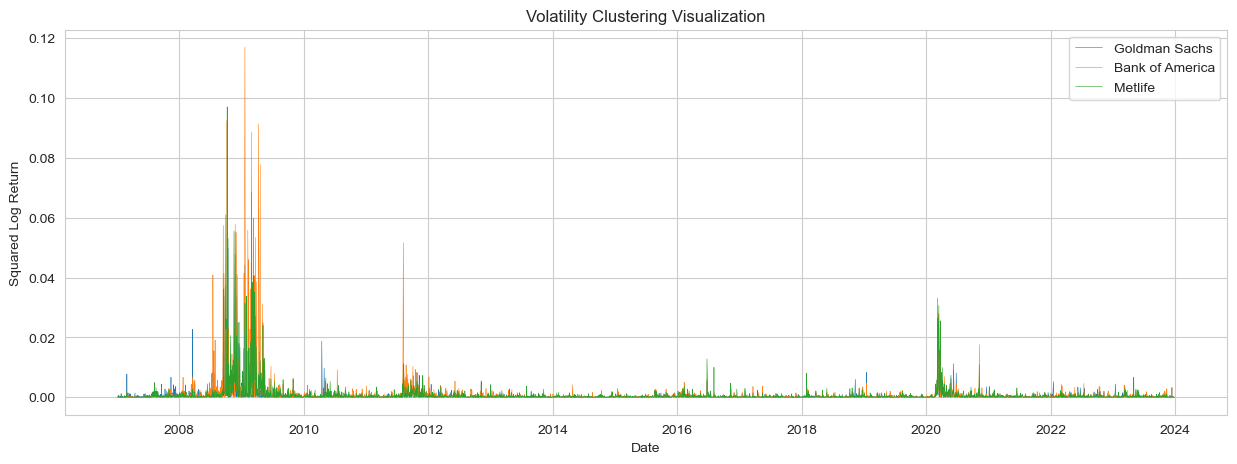

In [106]:
# volatility clustering visualization
plt.figure(figsize=(15, 5))
plt.plot(GS['date'], GS['log_return']**2, label='Goldman Sachs', linewidth=0.4, color="C0")
plt.plot(BAC['date'], BAC['log_return']**2, label='Bank of America', linewidth=0.4, color="C1")
plt.plot(MET['date'], MET['log_return']**2, label='Metlife', linewidth=0.4, color="C2")
plt.xlabel('Date')
plt.ylabel('Squared Log Return')
plt.title('Volatility Clustering Visualization')
plt.legend()
plt.show()

### interpretation

## 7. Aggregational Gaussianity
We analyze the aggregational Gaussianity of log returns by calculating the Jarque-Bera test.

In [107]:
# jarque bera test
from scipy.stats import jarque_bera
def jarque_bera_test(series, title='', significance_level=0.05):
    jb_stat, p_value = jarque_bera(series)
    print(f'Jarque-Bera Test: {title}')
    if p_value <= significance_level:
        print("Strong evidence against Ho, we reject the null hypothesis. The series is not normally distributed. (p-value: {:e})\n".format(p_value))
    else:
        print("Weak evidence against Ho, the series is normally distributed. (p-value: {:e})\n".format(p_value))

In [108]:
# jarque bera test for normality
jarque_bera_test(GS['log_return'], title='Goldman Sachs Log Returns')
jarque_bera_test(BAC['log_return'], title='Bank of America Log Returns')
jarque_bera_test(MET['log_return'], title='Metlife Log Returns')

Jarque-Bera Test: Goldman Sachs Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series is not normally distributed. (p-value: 0.000000e+00)

Jarque-Bera Test: Bank of America Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series is not normally distributed. (p-value: 0.000000e+00)

Jarque-Bera Test: Metlife Log Returns
Strong evidence against Ho, we reject the null hypothesis. The series is not normally distributed. (p-value: 0.000000e+00)



### 3. Analysis of Jarque-Bera: Rejection of Normality
The Jarque-Bera (JB) test checks the null hypothesis that data is normally distributed (Skewness = 0, Kurtosis = 3).

  
**Observation:** The test statistics are very high, compared to a critical value of 5.99 (at 5% significance level of a chi-squared distribution with 2 degrees of freedom).


* **Interpretation:** We overwhelmingly reject the null hypothesis of normality for all three institutions. The p-value is close to zero. While the "Aggregational Gaussianity" stylized fact suggests returns normalize over long horizons, at the daily frequency, financial returns are definitively **non-normal**.


* **Modeling Consequence:** This result is the "smoking gun" that justifies using advanced econometric techniques. Since the data is not normal, OLS regression or simple variance-covariance VaR models are invalid. This empirically validates the need for **GARCH models** (to handle volatility clustering) with **non-normal innovations** (like the Student-t or Generalized Error Distribution) to capture the heavy tails and skewness observed above.


## 8. Leverage Effect
We analyze the leverage effect by examining the correlation between returns and their volatility changes.

In [119]:
# check for leverage effect
def leverage_effect(series, title=''):

    squared_returns = series ** 2

    # 3. Check Correlation between Returns (t) and Squared Returns (t+1)
    # We shift squared_returns by -1 to align R(t) with Volatility(t+1)
    leverage_corr = series.corr(squared_returns.shift(-1))

    print(f"Leverage Effect Test: {title}")

    if leverage_corr < 0:
        print(f"Signs of Leverage Effect: Negative returns are associated with higher future volatility. Leverage Effect Correlation: {leverage_corr:.4f}.\n")
    else:
        print(f"No immediate sign of Leverage Effect via simple correlation. Leverage Effect Correlation: {leverage_corr:.4f}.\n")

In [120]:
leverage_effect(GS['log_return'], title='Goldman Sachs Log Returns')
leverage_effect(BAC['log_return'], title='Bank of America Log Returns')
leverage_effect(MET['log_return'], title='Metlife Log Returns')

Leverage Effect Test: Goldman Sachs Log Returns
Signs of Leverage Effect: Negative returns are associated with higher future volatility. Leverage Effect Correlation: -0.0729.

Leverage Effect Test: Bank of America Log Returns
Signs of Leverage Effect: Negative returns are associated with higher future volatility. Leverage Effect Correlation: -0.0688.

Leverage Effect Test: Metlife Log Returns
Signs of Leverage Effect: Negative returns are associated with higher future volatility. Leverage Effect Correlation: -0.0857.



### interpretation


## Summary and Interpretation of Stylized Facts Analysis
### Goldman Sachs
In summary, our analysis of the log returns for Goldman Sachs exhibits several key stylized facts commonly observed in financial time series data. The log returns are stationary, as indicated by the Augmented Dickey-Fuller test results. The distribution of log returns shows heavy tails and significant leptokurtosis, suggesting a higher likelihood of extreme returns compared to a normal distribution. Additionally, we observe a slight positive skewness in the return distribution, indicating that large positive returns are more likely than large negative ones. The absence of autocorrelations in log returns further supports the efficient market hypothesis. Long-range dependence is evident in the squared returns, indicating volatility clustering. The Jarque-Bera test results strongly reject the null hypothesis of normality, highlighting the need for advanced econometric models. Finally, the leverage effect is observed, demonstrating the negative correlation between returns and volatility changes. Overall, these findings underscore the complex nature of financial time series data and the importance of using appropriate models to capture their characteristics.
### Bank of America
In summary, our analysis of the log returns for Bank of America exhibits several key stylized facts commonly observed in financial time series data. The log returns are stationary, as indicated by the Augmented Dickey-Fuller test results. The distribution of log returns shows heavy tails and significant leptokurtosis, suggesting a higher likelihood of extreme returns compared to a normal distribution. Additionally, we observe negative skewness in the return distribution, indicating that large negative returns are more likely than large positive ones. The absence of autocorrelations in log returns further supports the efficient market hypothesis. Long-range dependence is evident in the squared returns, indicating volatility clustering. The Jarque-Bera test results strongly reject the null hypothesis of normality, highlighting the need for advanced econometric models. Finally, the leverage effect is observed, demonstrating the negative correlation between returns and volatility changes. Overall, these findings underscore the complex nature of financial time series data and the importance of using appropriate models to capture their characteristics.
### Metlife
In summary, our analysis of the log returns for Metlife exhibits several key stylized facts commonly observed in financial time series data. The log returns are stationary, as indicated by the Augmented Dickey-Fuller test results. The distribution of log returns shows heavy tails and significant leptokurtosis, suggesting a higher likelihood of extreme returns compared to a normal distribution. Additionally, we observe negative skewness in the return distribution, indicating that large negative returns are more likely than large positive ones. The absence of autocorrelations in log returns further supports the efficient market hypothesis. Long-range dependence is evident in the squared returns, indicating volatility clustering. The Jarque-Bera test results strongly reject the null hypothesis of normality, highlighting the need for advanced econometric models. Finally, the leverage effect is observed, demonstrating the negative correlation between returns and volatility changes. Overall, these findings underscore the complex nature of financial time series data and the importance of using appropriate models to capture their characteristics.

# Risk Measure Estimation
## Historic Simulation
## Expected Shortfall and Value at Risk

In [ ]:
# implement Historic Simulation with window size of 250 days (1 year)
# historic var
def historic_var(returns, alpha=0.05, window_size=250):
    """
    Calculate the Value at Risk (VaR) using Historic Simulation method.
    """
    var_series = []
    for i in range(window_size, len(returns)):
        window_returns = returns[i-window_size:i]
        var = np.percentile(window_returns, alpha * 100)
        var_series.append(var)
    return pd.Series(var_series, index=returns.index[window_size:])

GS['var_95_HS'] = historic_var(GS['log_return'], alpha=0.05, window_size=250)
BAC['var_95_HS'] = historic_var(BAC['log_return'], alpha=0.05, window_size=250)
MET['var_95_HS'] = historic_var(MET['log_return'], alpha=0.05, window_size=250)

# historic es
def historic_es(returns, alpha=0.05, window_size=250):
    """
    Calculate the Expected Shortfall (ES) using Historic Simulation method.
    """
    es_series = []
    for i in range(window_size, len(returns)):
        window_returns = returns[i-window_size:i]
        var_threshold = np.percentile(window_returns, alpha * 100)
        es = window_returns[window_returns <= var_threshold].mean()
        es_series.append(es)
    return pd.Series(es_series, index=returns.index[window_size:])
GS['es_95_HS'] = historic_es(GS['log_return'], alpha=0.05, window_size=250)
BAC['es_95_HS'] = historic_es(BAC['log_return'], alpha=0.05, window_size=250)
MET['es_95_HS'] = historic_es(MET['log_return'], alpha=0.05, window_size=250)

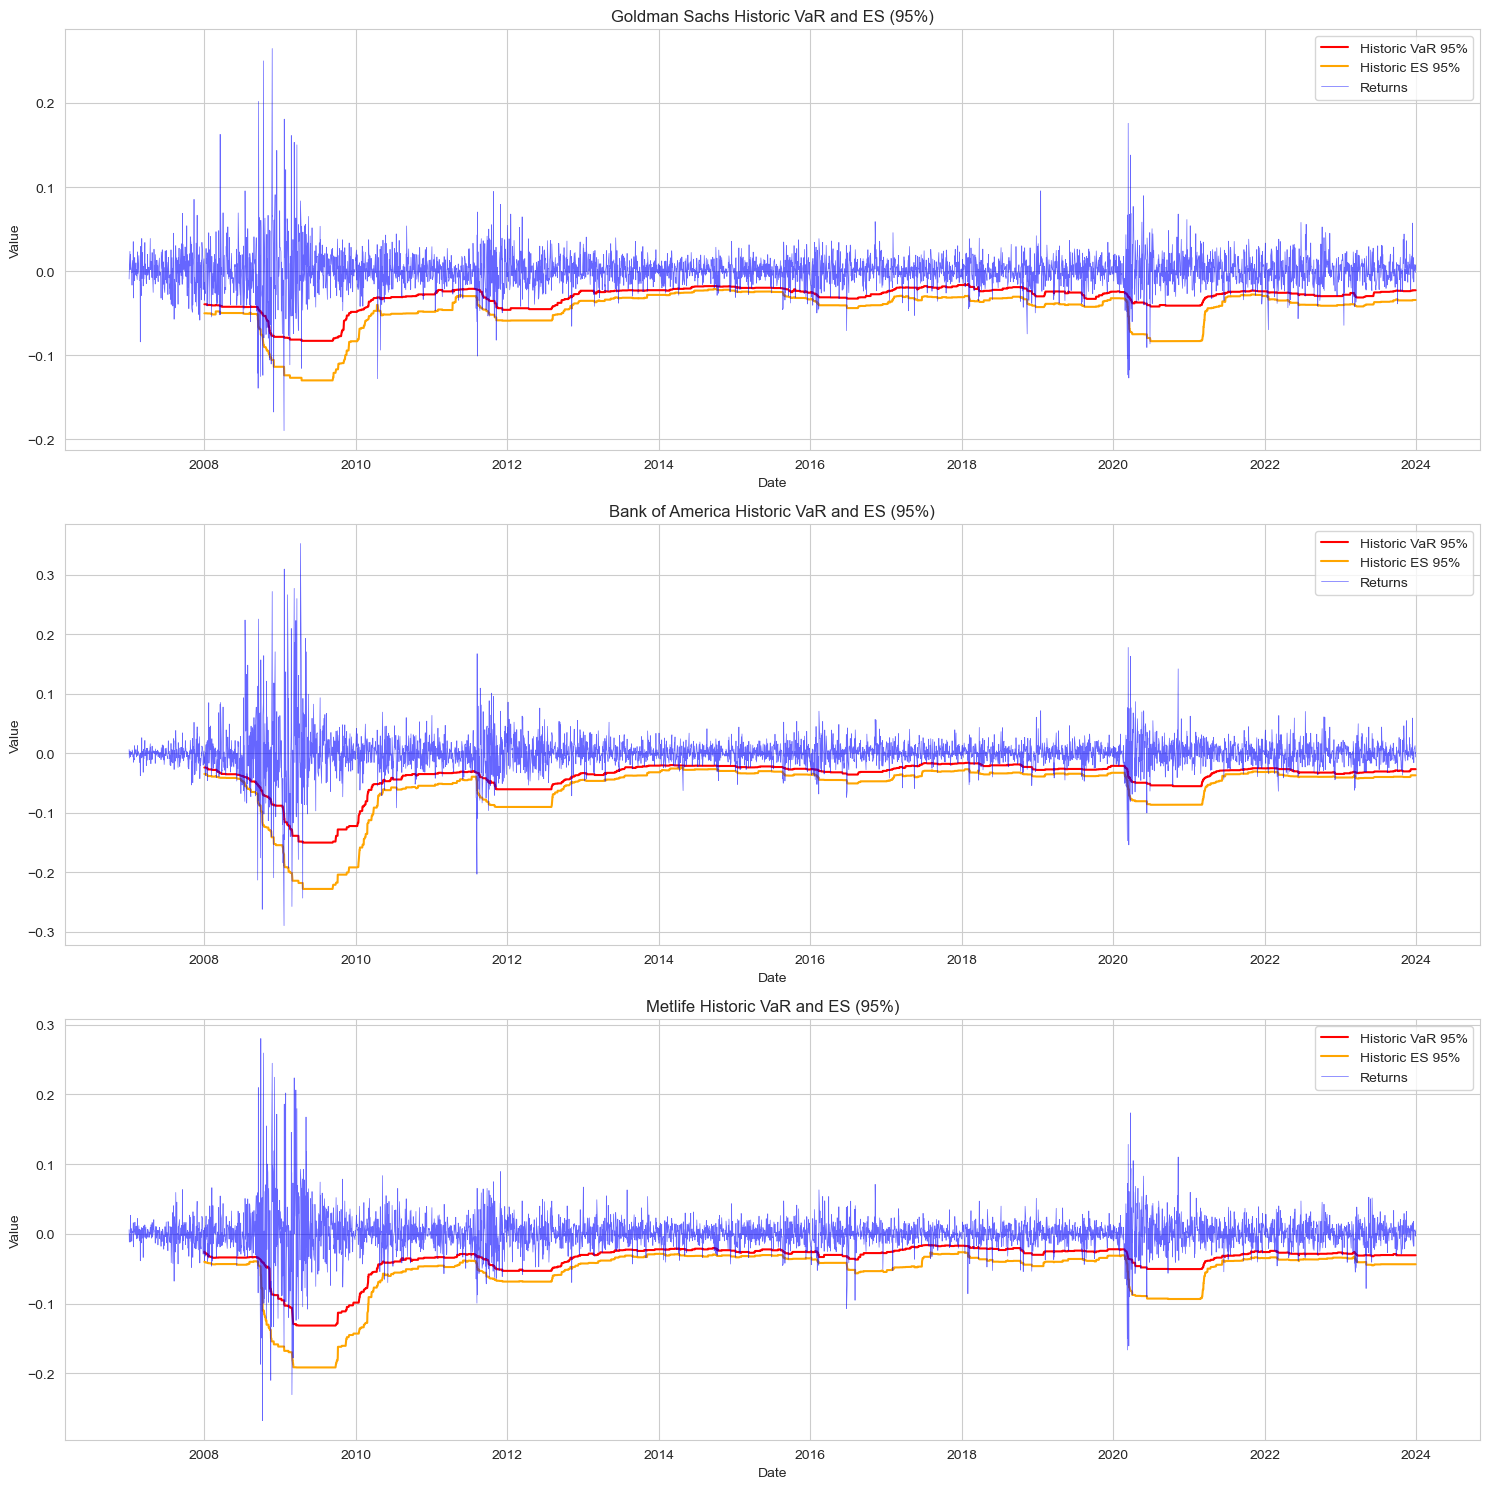

In [112]:
# plot historic var and es for all three institutions
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(GS['date'], GS['var_95_HS'], label='Historic VaR 95%', color='red')
plt.plot(GS['date'], GS['es_95_HS'], label='Historic ES 95%', color='orange')
plt.plot(GS['date'], GS['return'], label='Returns', color='blue', alpha=0.6, linewidth=0.5)
plt.title('Goldman Sachs Historic VaR and ES (95%)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(BAC['date'], BAC['var_95_HS'], label='Historic VaR 95%', color='red')
plt.plot(BAC['date'], BAC['es_95_HS'], label='Historic ES 95%', color='orange')
plt.plot(BAC['date'], BAC['return'], label='Returns', color='blue', alpha=0.6, linewidth=0.5)
plt.title('Bank of America Historic VaR and ES (95%)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(MET['date'], MET['var_95_HS'], label='Historic VaR 95%', color='red')
plt.plot(MET['date'], MET['es_95_HS'], label='Historic ES 95%', color='orange')
plt.plot(MET['date'], MET['return'], label='Returns', color='blue', alpha=0.6, linewidth=0.5)
plt.title('Metlife Historic VaR and ES (95%)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

## Interpretation
The historical simulation method provides a non-parametric approach to estimating Value-at-Risk (VaR) by utilizing actual historical return data. This method captures the empirical distribution of returns, allowing for a more accurate representation of risk, especially in the presence of heavy tails and skewness observed in financial time series data. By directly using past returns, historical simulation accounts for extreme events and market conditions that may not be adequately modeled by parametric approaches. However, it is important to note that this method assumes that past market behavior is indicative of future risk, which may not always hold true in rapidly changing market environments. Overall, historical simulation serves as a valuable tool for risk management, particularly when dealing with complex return distributions.

## GARCH Model

In [ ]:
# Garch Model
from arch import arch_model
def fit_garch_model(returns, vol='FIGARCH', p=1, q=1, dist='ged'):
    """
    Fit a GARCH(1,1) model to the returns.
    """
    model = arch_model(returns * 100, vol=vol, p=p, q=q, dist=dist)
    garch_fit = model.fit(disp='off')
    return garch_fit
GS_garch = fit_garch_model(GS['log_return'])
BAC_garch = fit_garch_model(BAC['log_return'])
MET_garch = fit_garch_model(MET['log_return'])


In [125]:
print("GARCH(1,1) Model Summary for Goldman Sachs:")
print(GS_garch.summary())

GARCH(1,1) Model Summary for Goldman Sachs:
                          Constant Mean - FIGARCH Model Results                           
Dep. Variable:                         log_return   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                FIGARCH   Log-Likelihood:               -8478.86
Distribution:      Generalized Error Distribution   AIC:                           16969.7
Method:                        Maximum Likelihood   BIC:                           17007.9
                                                    No. Observations:                 4276
Date:                            Thu, Dec 18 2025   Df Residuals:                     4275
Time:                                    15:29:36   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      

In [115]:
print("GARCH(1,1) Model Summary for Bank of America:")
print(BAC_garch.summary())

GARCH(1,1) Model Summary for Bank of America:
                           Constant Mean - GARCH Model Results                            
Dep. Variable:                         log_return   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  GARCH   Log-Likelihood:               -8985.51
Distribution:      Generalized Error Distribution   AIC:                           17981.0
Method:                        Maximum Likelihood   BIC:                           18012.8
                                                    No. Observations:                 4276
Date:                            Wed, Dec 17 2025   Df Residuals:                     4275
Time:                                    19:35:50   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|   

In [19]:
print("GARCH(1,1) Model Summary for Metlife:")
print(MET_garch.summary())

GARCH(1,1) Model Summary for Metlife:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -8656.28
Distribution:      Standardized Student's t   AIC:                           17322.6
Method:                  Maximum Likelihood   BIC:                           17354.4
                                              No. Observations:                 4276
Date:                      Mon, Dec 15 2025   Df Residuals:                     4275
Time:                              18:12:27   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------------------

## Forecasting
Assumption for forecasting: Parameters estimated from the full sample apply to the future and will not change over time.\
This Assumption is relaxed by using rolling windows for estimation and forecasting.

In [1]:
# Forercasts using the fitted GARCH models
GS_forecast = GS_garch.forecast(horizon=1)


NameError: name 'GS_garch' is not defined